# Assessing Ad Performance using Bayesian A/B Algorithms

This project assesses the performance of different adverts, as measured by Conversion, using several different Bayesian Algorithms applied to A/B testing. The following Algorithms are explored:

- Epsilon-Greedy
- Optimistic Initial Value
- Upper Confidence Bound
- Thompson Sampling

The dataset used is available here https://www.kaggle.com/osuolaleemmanuel/ad-ab-testing. As well as discussing the intracacies of each algorithm, we also consider their applicability to online learning and marketing.

***

<br>

In [1]:
# Initialization ##############################################################

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random

# Load dataset
#df = pd.read.csv()

***

## Multi-Armed Bandit Problem

Consider a gambler in a casino who has the option to pull one of several slot machines. The gambler must decide which machine to pull at each iteration in order to maximize some reward. Each machine provides a random reward from some (unknown) probability distribution specific to that machine. The objective is to maximize the total reward from a sequence of lever pulls of the slot machines. An agent simultaneously tries to acquire new knowledge ("exploration") whilst at the same time optimizing their decisions based on existing knowledge. The problem requires balancing reward maximization based on the knowledge already acquired with attempting new actions to further increase knowledge. This is known as the exploration-exploitation dilemma in Reinforcement Learning. 

In this specific implementation of the Multi-Armed Bandit problem, we consider the Binary multi-armed bandit problem in which each arm, $j$, is a Bernoulli trial that issues a reward of value 1 with probability $p_j$ and 0 otherwise. 

## Bayesian A/B Testing

The adaptive approach of Bayesian A/B testing is particularly useful for online platforms. Show showing of different adverts or the use of different webpages for conversion. A/B tests can be applied to any problem in which we want to randomly assign different treatments and assess which treatment optimizes some objective function or statistic. For example, this can include validating the positive impact of drugs, selecting from severl webpage or advert designs and the content to show on news feeds based on their engagement. 

Standard A/B Testing assigns different treatments to a control and (potentially more than one) test group. In medical statistics, this includes sample size calculations for the achievement of a specific test power. The mean value and confidence intervals for the test and control groups are then compared after a pre-determined number of trials, and then the treatment with the best performance is assigned to the whole population. A problem with this approach is that it can often continue to assign the sub-optimal treatment to one of the groups.

Also, for sample size calculations, this assumes we have a good estimate of the effect size- if we have strong prior knowledge that we expect one advert to perform better than the other we should be factoring this into our analysis.

Another issue with frequentist approaches to hypothesis testing is the subjectivity in statistical significance. The p-value used to choose between treatments can also vary as the number of trials increases, hence a difference in performance between two treatments can vary between significance and insignificance. 

__Explore-Exploit Dilemma__

One one hand, we need enough samples to provide a low-variance estimate of the CTR for each advert but on the other hand we would like to quickly exploit the advert with the highest click-through rate in order to maximize sales and revenue. Bayesian methods provide an effective way of doing this. This is also the main trade-off in reinforcement learning models

Bayesian statistics enables one to place distributional assumptions on the estimates of the mean (conversion rate), which gives an improved measure of uncertainty as to the true value of the parameter. We can then use Bayes Theorem to combine the prior and likelihood to get a posterior distribution for the click-through-rate. 

The discussed algorithms allow us to balance exploration and exploitation. 

_Exploration_ involves collecting addtional data for each bandit to increase our certainty (reduce the variance) in the estimate of the conversion rate for each bandit. 

_Exploitation_ involves showing the optimal bandit (the one with the highest MLE of the conversion rate) to consumers, in order to maximize conversion and sales. 

In particular, we want both a high level of exploration and exploitation, however at each iteration there is a choice between exploration or exploitation- we can't do both at the same time. 

Other problems with the standard frequentist approach to A/B testing are. Standard A/B testing is a purely exploratative technique where we randomly assign users to different versions of an advert or website landing pages usually for some pre-specified number of trials and then we jump straight from this exploration of the choices (bandits) to showing the bandit with the highest win rate to all users. 

### Limitations of Standard A/B Testing

- During the exploratory phase information is wasted whilst we continue to explore inferior bandits in order to gather more data

- May have to run the test for a long time in order to gather enough data to gain enough statistical confidence to select amongst the bandit

- Performance of different bandits may change over time and there may be fluctuations between significance and insignificance of results as more data is gathered. This is particularly prevalent when the assumption of independent trials is violated. 

- There is a jump from exploration to exploitation, rather than a smooth transition

## Click Through Rate

The click through rate is the probability the user clicks an advert/link. Each 'trial' has a Bernoulli distribution.

$$CTR = \frac{No. Clicks}{No. Impressions}$$

***

### Multi-Armed Bandit Algorithms

Bandit Algorithms attempt to maximize the expected gain of a problem by balancing exploration and exploitation, a key principle of Reinforcement Learning. A fixed set of resources is allocated amongst a set of competing choices whose a priori 'win rates' are unknown. Only by collecting data are we able to estimate the win rate of each choice, but we would also like to quickly exploit the choice that has the highest estimated win rate. Therefore the problem is to gather enough information to accurately estimate the win rate of each bandit, but also to identify and exploit the bandit with the highest win rate as quickly as possible. 

Instead of two distinct periods of exploration and exploitation (as for standard A/B testing), Multi-Armed Bandits simulataneously carry out exploration and exploitation: the level of exploration is high when little data is gathered but the level of exploitation increases as the amount of data and certainty in estimated win rates increases. Therefore more users will be allocated to better performing bandits as the amount of data increases. 

Each 'bandit' represents a one of the choices available and at each stage we can choose which bandit we would like to play. 

***

## Epsilon-Greedy

Epsilon-Greedy adjusts the 'Greedy' algorithm to randomly allocate one of the bandits with probability $\epsilon$. In this case, being 'greedy' means choosing the bandit with the highest maximum likelihood estimate. However this can result in being stuck in suboptimal bandits, for example if only one of the bandits returns a sale in the first iteration, it will always have a higher MLE estimate for the conversion rate than the other bandits. Epsilon-Greedy alters this 'greedy' approach by having a small probability of choosing a bandit at random, $\epsilon$. The controls the amount of exploration- a higher value of $\epsilon$ is associated with a greater amount of exploration of different bandits but a lower level of exploitation by assigning the optimal bandit (advert) to each user.  We can also introduce a __cooling schedule__, whereby the value of $\epsilon$ (level of exploration) decreases at each iteration, enabling us to exploit the optimal bandit as we collect more data and hence become more confident in our estimates of net conversion for each bandit. The value of epsilon therefore decays over time, decreasing as the amount of data gathered increases. 

Epsilon-Greedy is a 'greedy' bandit algorithm. In the context of reinforcement learning, a purely 'greedy' algorithm is one that always plays what it believes to be the best bandit at any given time (i.e. the one with the highest estimated win rate). In other words, it always exploits. However, epsilon-greedy adjusts this approach by randomly selecting another bandit with probability $\epsilon$, each time a bandit is assigned to a user. This enables the algorithm to explore the space of possible bandits. 

In particular, choosing a cooling schedule that declines linearly with the number of iterations, $n$, results in a REGRET that increases logarithmically, as opposed to linearly (cite the paper for UCB1 and also talk about the concept of minimizing the regret and define it here. Also add in th algorithm pseudo codes like they are added in that paper.

In [1]:
# Pseudo-code ##################################################################

# While TRUE:
#   p = random no in [0, 1]
#   if p < epsilon:
#       j = choose a random bandit
#   else:
#       j = argmax(estimated bandit means)
#   x = play bandit j and get reward bandits[j].
#   Update Mean.
#   Alter Epsilon using cooling schedule if specified

We create a bandit class which enables us to apply relevant methods to the objects of this class:

1) __init__: initialize each probability in the list of bandit probabilities

2) __pull__: simulates a True/False outcome when each bandit is played whose value depends on the true mean win rate for the bandit 

3) __update__: updates the estimated win rate

In [3]:
class Bandit:
    def __init__(self, p):
        # p: win/conversion rate
        self.p = p
        self.p_estimate = 0
        self.N = 0

    def pull(self):
        # Draw a win (converted) with probability p
        # (Generates a Boolean or equivalent binary value for win/ loss)
        return np.random.random() < self.p

    def update(self, x):
        self.N += 1
        # update the estimate probability of success
        self.p_estimate = (1 / self.N) * ((self.N - 1) * self.p_estimate + x)

In [4]:
# Epsilon-Greedy Simulation
def EG_fun(bandits, Num_trials, EPS, cooling_schedule, rewards, num_times_explored, num_times_exploited, num_optimal, optimal_j): 

    # If we have a cooling schedule, the value of epsilon must decline at each iteration
    for i in range(Num_trials):

        #Use epsilon-greedy to select next bandit
        if np.random.random() < EPS:
            num_times_explored += 1
            #choose random bandit
            j = np.random.randint(len(bandits))
        else:
            num_times_exploited += 1
            #choose bandit with optimal p.estimate
            j = np.argmax([b.p_estimate for b in bandits])

        if j == optimal_j:
            num_optimal += 1

        #pull arm for bandit with largest sample (generate a 'win' / 'loss')
        x = bandits[j].pull()

        #update reward log and EPS
        rewards[i] = x
        EPS = EPS ** cooling_schedule

        #Update the distribution for the bandit we selected
        bandits[j].update(x)
    
    #Return a list of parameter values
    return rewards, num_times_explored, num_times_exploited, num_optimal

Now we simulate a function that compares the performance of the epsilon-greedy algorithm for different values of the cooling schedule. We consider (identify in the literature which type of cooling schedule is preferred). We then plot graphs to compare the performance of the algorithm with different cooling schedules. Our prior knowledge and intuition suggests that we want a cooling schedule that declines fast enough to exploit the best performing bandit but one that isn't so fast to decline that it fails to explore the bandit and potentially select a sub-optimal bandit. This will require some tuning- we also expect that the more bandits we have and the smaller the gaps in true probabilities, the slower epsilon should decline, since we require more time to explore the bandits in order to identify and then exploit the optimal bandit. Also draw some graphs that illustrate the performance with the number of iterations of each of the different algorithms.

CREATE A PYTHON UNIT TEST FILE IN INTELLIJ IDEA

The Cooling Rate, EPS, is similar to the cooling schedule in Simulated Anealing and controls the trade-off between exploitation and exploration of the algorithm. Exploring the space of possible solutions will more likely result in the algorithm selecting the Bandit with the greatest conversion, whilst exploiting takes advantage of the improved performance. 

In order to maximize profit, an online advertiser could use Machine Learning algorithms to improve the conversion of adverts by placing those adverts that yield the highest conversion rate. Moreover, One could split adverts depending on the characterisitics associated with the performance of individual adverts. That is, effctively run different AB tests based on the levels of a variable. However, this results in information loss, if each A/B test is carried out independently. Therefore we require an algorithm (and to perhaps create one if one does not yet exist), that uses information from other A/B tests but also takes account of information in its own AB test to diverge from other groups if required. 

***

## Optimistic Initial Value

In the case of Optimistic Initial Values, we initialize the estimated mean for each bandit as a very large value (much larger than the value we expect for the true mean). This enables a long period of exploration as the mean of each bandit decreases. The initial decrease in estimated means will be roughly the same at the start for each bandit, but as the number of iterations increases, the optimal bandit will eventually converge to a higher mean estimate than the other bandits. The larger the intiial value the mean is initialized to relative to the true mean of each bandit, the greater the period of exploration will be at the start of the experiment. Therefore, the intial value is a hyperparameter that can be used to specify the level of exploration we require. 

In [8]:
# Pseudo Code

# Initialize bandit means to some large value
# While TRUE:
#   p = random no in [0, 1]
#   if p < epsilon:
#       j = choose a random bandit
#   else:
#       j = argmax(estimated bandit means)
#   x = play bandit j and gain reward bandits[j]
#   update estimated mean of j
#   update epsilon if cooling schedule specified

In [68]:
a = 100.
type(a)

float

In [65]:
class Bandit_OIV:
    # Initialize real value of p and estimate of p to large value
    def __init__(self, p):
        self.p = p
        self.p_estimate = 100. # (very large value relative to true mean)
        self.N = 1

    # Simulation- generate win with probability p- produces a TRUE/FALSE Boolean
    def pull(self):
        return(np.random.random() < self.p)

    # Update estimated probability of success
    def update(self, x):
        self.N += 1
        self.p_estimate = ((self.N - 1) * self.p_estimate + x) / self.N

In [69]:
# Optimistic Initial Values (OIV) Simulation
def OIV_fun(bandits, Num_trials, rewards, num_optimal, optimal_j): 

    for i in range(Num_trials):

        # Always select bandit with highest estimated win rate
        j = np.argmax([b.p_estimate for b in bandits])

        if j == optimal_j:
            num_optimal += 1

        x = bandits[j].pull()

        # Update reward log
        rewards[i] = x

        # Update distribution for selected bandit
        bandits[j].update(x)
    
    # Return list of parameters
    return rewards, num_optimal

***

## Upper Confidence Bound

The Upper Confidence Bound (UCB) uses Hoeffdrig's inequality which places an upper bound on the deviation between the true mean and the sample mean as the sample size (n) increases:

$$P(\bar{X}_n - E[x] \geq t) \leq e^{- 2 n t^2}$$

where t is the error between the true and sample means.  

In [ ]:
# Pseudo Code ##################################################################

# Initialize by playing each bandit once
# While TRUE:
#   Play j = argmax(Upper Confidence Bound)

In [1]:
class Bandit_UCB:
    # Each bandit object should be a probability, p
    def __init__(self, p):
        self.p = p
        self.p_estimate = 0
        self.N = 0
        
    # Pull function
    def pull(self):
        return np.random.random() < self.p

    # Update estimate of win rate
    def update(self, x):
        self.N += 1
        self.p_estimate = ((self.N - 1) * self.p_estimate + x) / self.N

In [78]:
# Function to calculate Upper Confidence Bound for each bandit
def ucb(p_estimate, nj, n, gamma):
    return p_estimate + np.sqrt(gamma * np.log(n) / nj)

In [79]:
# Optimistic Initial Values (OIV) Simulation
def UCB_fun(bandits, Num_trials, rewards, num_optimal, optimal_j, gamma = 2): 
    
    # gamma: explore-exploit hyperparameter (greater gamma implies more exploration)
    
    # Initialize vector storing no. iterations
    total_plays = 0
    
    # Initialize by playing each bandit once
    for j in len(bandits):
        x = bandits[j].pull()
        rewards[j] = x
        bandits[j].update()
        total_plays += 1

    for i in range(len(bandits), Num_trials):
        
        # Always select bandit with highest Upper Confidence Bound
        j = np.argmax([ucb(b.p_estimate, b.N, total_plays, gamma)])

        if j == optimal_j:
            num_optimal += 1

        x = bandits[j].pull()

        # Update reward log and no. plays
        rewards[i] = x
        total_plays += 1

        # Update distribution for selected bandit
        bandits[j].update(x)
    
    # Return list of parameters
    return rewards, num_optimal

In [76]:
list(range(3, 10))

[3, 4, 5, 6, 7, 8, 9]

***

## Thompson Sampling

A Bayesian A/B testing approach that places a probability distribution on the win rate for each bandit. Prior expectations can also be specified, although typically a non-informative prior is specified. This assumes that all values of the win rates, $p \in [0, 1]$ are equally likely. Bayes Theorem is then used to calculate the posterior distribution. In order to avoid an intractable integral and a simple calculation, the Beta-Bernoulli conjugate prior can be used. One could also use non-standard priors, however this would require approximation of the integral via Markov Chain Monte Carlo (MCMC) simulations. 

### Beta Prior

Prior: $\theta \sim Beta(\alpha, \beta) $

Bernoulli Likelihood: $\prod_{i=1}^N \theta^{x_i} (1 - \theta) ^ {(1 - x_i)}$

Posterior: $p(\theta | X ) \sim Beta(N \bar{x} + \alpha, N (1 - \bar{x}) + \beta)$

The exact specification of the prior depends on our prior knowledge of the distribution of the click through rate for each advert. Lets assume that the average click throught rate for similar adverts run by our company is 0.02. We can use this knowledge to inform our prior distriution for the click through rate. 

If we had no prior knowledge, we could specify the uniform distribution with support [0, 1] implying equal probability that the click through rate lies in the range [0, 1]. We could also use Jeffrey's prior- explain this in greater detail. 

We know that the mean of a Beta distribution is given by $E[x] = \frac{\alpha}{\alpha + \beta}$ and Variance $Var[x] = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}$

Given we expect the conversion to be relatively small, we expect a large $\beta$ relative to $\alpha$. To ensure the mean is 0.025, we can choose $\alpha$ and $\beta$ such that $\beta$ = $39 \alpha$. Choosing $\alpha = 1$ and $\beta = 39$ seems to give a reasonable distribution for the expected click through rate for each advert. Consider the 3 options a), b) and c).

In [99]:
# Sample means from distribution of each option and plot
data = {'Group':list(np.repeat(["A", "B", "C"], [100000,100000,100000], axis = 0)),
        'Win Rate':list(np.append(np.random.beta(a = 1, b = 39, size = 100000), 
            [np.random.beta(a = 5, b = 195, size = 100000),
            np.random.beta(a = 0.2, b = 7.8, size = 100000)]))}
df = pd.DataFrame(data)
df.head()

,Group,Win Rate
0,A,0.014768
1,A,0.081667
2,A,0.009970
3,A,0.013838
4,A,0.008986


(0, 0.15)

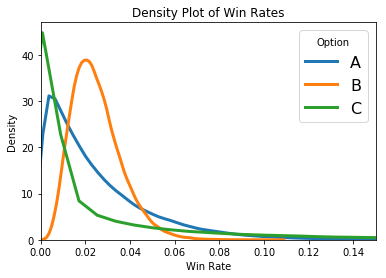

In [100]:
# List of five airlines to plot
options = ['A', 'B', 'C']

# Iterate through the five airlines
for i in options:
    # Subset to the airline
    subset = df[df['Group'] == i]
    
    # Draw the density plot
    sns.distplot(subset['Win Rate'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = i)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Option')
plt.title('Density Plot of Win Rates')
plt.xlabel('Win Rate')
plt.ylabel('Density')
plt.xlim(0, 0.15)

In this case we believe option b) to be the better option (of course there are several potential ways to do this- see the Bayesian St Andrews model for elicitation of expert beliefs. 

In [2]:
# while TRUE:
#   sample from posterior for mean of each bandit j
#   play bandit with highest simulated mean value
#   update posterior distribution for selected bandit

In [ ]:
class Bandit_TS:
    def __init__(self, p):
        self.N = 0
        self.p = p

    # Sample from the posterior distribution for the mean of bandit j
    def sample(self):
        return np.random.beta(a, b)

    def pull(self):


    # Update values of a and b in Beta distribution
    def update(self):
        self.N += 1
        a = , b =

In [ ]:
# Thompson Sampling Simulation
def TS_fun(bandits, Num_trials, rewards, num_optimal, optimal_j, gamma = 2, alpha, beta): 
    
    # gamma: explore-exploit hyperparameter (greater gamma implies more exploration)
    
    # Initialize vector storing no. iterations
    total_plays = 0
    
    # Initialize by playing each bandit once
    for j in len(bandits):
        x = bandits[j].pull()
        rewards[j] = x
        bandits[j].update()
        total_plays += 1

    for i in range(len(bandits), Num_trials):
        
        # Always select bandit with highest Upper Confidence Bound
        j = np.argmax([ucb(b.p_estimate, b.N, total_plays, gamma)])

        if j == optimal_j:
            num_optimal += 1

        x = bandits[j].pull()

        # Update reward log and no. plays
        rewards[i] = x
        total_plays += 1

        # Update distribution for selected bandit
        bandits[j].update(x)
    
    # Return list of parameters
    return rewards, num_optimal

### Prior Expectations

Given our prior domain experience of advertising, we expect click through rates (CTRs) to lie in the region 1% - 5%. Instead of using a Beta[1, 1] prior, which corresponds to the uniform distribution on [0, 1], we can use other parameters [a, b] to represent our prior knowledge of the expected value of the click through rate.

Could simulate some trials, say 100 and then plot the posterior distributions for each bandit to understand and show how the algorithm works

show some graphs displaying how the Thompson sampling technique performs

***

## Simulation

Next create a function to simulate trials. This function works with any of the 4 algorithms we have so far considered, by specifying the required algorithm using the 'method' argument:

Because we don't have training and test data as such, it is not possible to directly compare each algorithm. Instead, we can assess the performance of each algorithm on simulated data. It has been noted in the literature that the Bayesian Thompson Sampling algorithm is typically the preferred choice.

In [52]:
def Simulation(Bandit_Probabilities, cooling_schedule = 1, Num_trials = 10000, EPS = 0.1, method = "epsilon greedy", 
              print_results = True, plot_results = True):
    
    """Function to simulate epsilon-greedy bandit algorithm
    Inputs: 
        Bandit_Probabilities: list of known conversion probabilities for each bandit
        cooling_schedule: hyperparameter to adjust speed of exploration decay
        Num_trials: scalar indicating the number of simulations to perform
        EPS: scalar value for epsilon"""
    
    pass

    possible_methods = ["epsilon greedy", "optimistic initial value", "upper confidence bound", "thompson sampling"]
    if method.lower() not in possible_methods:
        #could use assertion here but if statement enables us to print allowed greetings
        print("Method must be one of: ", possible_methods) 
        quit()
        
    #Initialize each probability as a Bandit object
    bandits = [Bandit(p) for p in Bandit_Probabilities]

    #Record metrics
    rewards = np.zeros(Num_trials)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0
    optimal_j = np.argmax([b.p for b in bandits])
    print("optimal j:", optimal_j)
    
    arguments = [bandits, Num_trials, EPS, cooling_schedule, rewards, num_times_explored, 
                 num_times_exploited, num_optimal, optimal_j]
    
    #Run algorithm
    if method == possible_methods[0]:
        rewards, num_times_explored, num_times_exploited, num_optimal = EG_fun(*arguments)
        
    if method == possible_methods[1]:
        rewards, num_times_explored, num_times_exploited, num_optimal = EG_fun(*arguments)

    if method == possible_methods[2]:
        rewards, num_times_explored, num_times_exploited, num_optimal = EG_fun(*arguments)
    
    if method == possible_methods[3]:
        rewards, num_times_explored, num_times_exploited, num_optimal = EG_fun(*arguments)
        
    # Print and Plot results
    
    if print_results == True:
        # Print summaries
        print("Total rewards earned:", rewards.sum())
        print("Overall win rate:", 100 * rewards.sum() / Num_trials, "%")
        print("No. times explored:", num_times_explored)
        print("No. times exploited:", num_times_exploited)
        print("No. times selected optimal bandit:", num_optimal)
        
    if plot_results == True:
        # Calculate cumulative sum of rewards and win rate at each iteration
        # We could plot different results depending on the algorithm- have an option where
        # we can simulate more than 1 algorithm and plot the sum of rewards for each algorithm
        cumulativeRewards = np.cumsum(rewards)
        win_rate = 100 * cumulativeRewards / np.arange(1, Num_trials + 1)
        plt.plot(win_rate, label = "Algorithm win rate")
        plt.plot(100 * np.ones(Num_trials) * np.max(Bandit_Probabilities), label = "Optimal Bandit win rate")
        plt.legend()
        plt.title("Win Rate vs No. Iterations")
        plt.xlabel("No. Iterations")
        plt.ylabel("Win Rate (%)")
        
        # Also plot trade-off between exploration and exploitation
    
    # Plot Results
    return rewards, num_times_exploited, num_times_explored, num_optimal

Clearly there are times when epsilon-greedy does NOT accept the optimal bandit- consider showing/plotting it not converging to the optimal bandit vs no iterations as this is obviously a bit of a problem given we typically might not have a huge no. trials for the algorithm to eventually converge to the optimal bandit (which of course it will as the nu. trials becomes large (tends to infinity). 

optimal j: 2
Total rewards earned: 163.0
Overall win rate: 1.63 %
No. times explored: 5004
No. times exploited: 4996
No. times selected optimal bandit: 6398


(array([0., 0., 0., ..., 0., 0., 0.]), 4996, 5004, 6398)

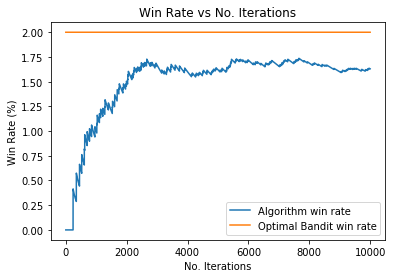

In [64]:
random.seed(10)
Simulation(Bandit_Probabilities = [0.01, 0.015, 0.02], EPS = 0.5)

### Comparing Different Values of Epsilon

There is a trade-off between exploration and exploitation when choosing different values of epsilon. A larger value of epsilon will result in greater exploration, which might be more important at the start of an experiment, however once the optimal bandit has been identified, we wold like to exploit this information and show only the optimal bandit/ advertisement. A smaller value of $\epsilon$ enables us to exploit optimal values however results in less exploration which can lead to the exploitation of sub-optimal bandit for a large number of iterations. Introducing a cooling schedule allows the value of $\epsilon$ to decline as the number of iteration increases, allowing us to 'tune' this trade-off and optimize our results. We might also need to take account the length of the experiment when deciding what approach to take- shorter experiments favour greater exploration since there is less time to identify and exploit the optimal bandit, while longer experiments (higher potential sample size) benefit more from exploitation (particularly a declining value of epsilon). 

In [23]:
np.arange(1, 5)

array([1, 2, 3, 4])

In [31]:
arguments = ["hello", "goodbye"]

num_times_explored = 0
num_times_exploited = 0
num_optimal = 0

arguments = [num_times_exploited, num_optimal]

def exampleFun(num_optimal, num_times_exploited):
    print(num_optimal)
    
exampleFun(*arguments)

0


In [7]:
Num_trials = 10000
EPS = 0.1
Bandit_Probabilities = [0.3, 0.35, 0.4]

Simulation(Bandit_Probabilities = [0.3, 0.35, 0.4], cooling_schedule=0.1)

for b in Bandit_Probabilities:
    print("Mean estimate:", b.p_estimate)

optimal j: 2


NameError: name 'bandits' is not defined

***

## Marketing Application

Now that we have compared and assessed the relative performance of the different algorithms, we will apply Bayesian Thompson Sampling to a marketing application. This algorithm is typically used in this scenario as it optimizes the explore-exploit dilemma relatively well in comparison to the other algorithms. To fully assess this alogorithm, we would require a website/webpages where users may click on features on that webpage (adverts, banners, subscription links). As well as assessing the performance of different adverts, we can also compare the performance of different advert locations on the website.

In [65]:
#import data

***

## Conclusion

Which Bandit model was the best?

Multi-Armed Bandits provide several advantages over traditional A/B Testing, enabling one to automate the process of bandit selection and optimize opportunity cost and thus sales by simultaneously balancing the explore-exploit dilemma. However, such algorithms require the user to be comfortable handing over decision-making to an automated system. 

***

## References

- Add original papers for each Algorithm

https://homes.di.unimi.it/~cesabian/Pubblicazioni/ml-02.pdf